## CNN

#### 생각할 점
> * 우선 vaildation의 비율을 얼마나 가져가야하나?
> * 중간과정의 이론이 필요함

In [ ]:
# !pip install tensorflow

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

(100, 100, 3)

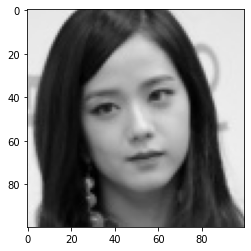

In [45]:
# 경로가 잘 설정되었는가 판단
img = image.load_img('train/train_Jisu/train_Jisu_0.jpg')
plt.imshow(img)
cv2.imread('train/train_Jisu/train_Jisu_0.jpg').shape

In [7]:
# 훈련을 위한 클래스 초기화
train = ImageDataGenerator(rescale= 1/255)
vaildation = ImageDataGenerator(rescale=1/255)

In [28]:
train_dataset = train.flow_from_directory('train/', # 폴더 바로 전까지 경로를 설정
                                         target_size = (100, 100), # 사이즈 통일 (나는 미리 조절을 해둠)
                                         batch_size = 3, # ?
                                         class_mode = 'binary') # 분류 대상은 두가지 이므로 'binary'
validation_dataset = train.flow_from_directory('validation/', # 폴더 바로 전까지 경로를 설정
                                         target_size = (100, 100), # 사이즈 통일 (나는 미리 조절을 해둠)
                                         batch_size = 3, # ?
                                         class_mode = 'binary') # 분류 대상은 두가지 이므로 'binary'

Found 270 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [29]:
# 인덱스 변환 (0,1로 분류)
train_dataset.class_indices

{'train_Jisu': 0, 'train_Yezi': 1}

In [30]:
# 데이터 또한 변환되었는가 확인
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [31]:
# 모델 생성
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16, # 유지할 필터
                                                            (3,3), # 필터 크기
                                                            activation = 'relu', # 활성화 함수
                                                            input_shape = (100,100,3)), # 내 데이터 (정확하게 작성해야함)
                                    tf.keras.layers.MaxPool2D(2,2), # 맥스풀링으로 2*2크기를 가짐
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu',input_shape = (100,100,3)), 
                                    tf.keras.layers.MaxPool2D(2,2), 
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu',input_shape = (100,100,3)), 
                                    tf.keras.layers.MaxPool2D(2,2), 
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation='sigmoid') # 멀티 : 소프트맥스 / 이진 : 시그모이드
                                    ])

In [32]:
model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
             metrics=['accuracy'])

In [34]:
model_fit =model.fit(train_dataset,
                    steps_per_epoch = 3,
                    epochs=150, # 횟수를 증가 시키기 (나는 150회)
                    validation_data=validation_dataset)

Epoch 1/150
3/3 [==============================] - 0s 53ms/step - loss: 0.3435 - accuracy: 0.7778 - val_loss: 0.5807 - val_accuracy: 0.6000
Epoch 2/150
3/3 [==============================] - 0s 44ms/step - loss: 0.5279 - accuracy: 0.7778 - val_loss: 0.7919 - val_accuracy: 0.6000
Epoch 3/150
3/3 [==============================] - 0s 43ms/step - loss: 0.2135 - accuracy: 0.8889 - val_loss: 0.6716 - val_accuracy: 0.7000
Epoch 4/150
3/3 [==============================] - 0s 44ms/step - loss: 0.6332 - accuracy: 0.6667 - val_loss: 0.7207 - val_accuracy: 0.4000
Epoch 5/150
3/3 [==============================] - 0s 46ms/step - loss: 0.4000 - accuracy: 0.8889 - val_loss: 0.9872 - val_accuracy: 0.5000
Epoch 6/150
3/3 [==============================] - 0s 47ms/step - loss: 0.4568 - accuracy: 0.8889 - val_loss: 0.5593 - val_accuracy: 0.7000
Epoch 7/150
3/3 [==============================] - 0s 46ms/step - loss: 0.4488 - accuracy: 0.8889 - val_loss: 0.7184 - val_accuracy: 0.7000
Epoch 8/150
3/3 [===

3/3 [==============================] - 0s 44ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.8531 - val_accuracy: 0.7000
Epoch 60/150
3/3 [==============================] - 0s 45ms/step - loss: 0.1951 - accuracy: 0.8889 - val_loss: 0.3955 - val_accuracy: 0.8000
Epoch 61/150
3/3 [==============================] - 0s 50ms/step - loss: 0.2392 - accuracy: 0.7778 - val_loss: 0.9610 - val_accuracy: 0.7000
Epoch 62/150
3/3 [==============================] - 0s 46ms/step - loss: 0.2975 - accuracy: 0.8889 - val_loss: 1.3067 - val_accuracy: 0.7000
Epoch 63/150
3/3 [==============================] - 0s 44ms/step - loss: 0.7319 - accuracy: 0.6667 - val_loss: 0.9145 - val_accuracy: 0.6000
Epoch 64/150
3/3 [==============================] - 0s 45ms/step - loss: 0.5203 - accuracy: 0.7778 - val_loss: 1.2129 - val_accuracy: 0.5000
Epoch 65/150
3/3 [==============================] - 0s 44ms/step - loss: 0.3420 - accuracy: 0.8889 - val_loss: 0.7221 - val_accuracy: 0.7000
Epoch 66/150
3/3 [========

3/3 [==============================] - 0s 47ms/step - loss: 0.1256 - accuracy: 1.0000 - val_loss: 0.4158 - val_accuracy: 0.8000
Epoch 118/150
3/3 [==============================] - 0s 45ms/step - loss: 0.0870 - accuracy: 1.0000 - val_loss: 0.4975 - val_accuracy: 0.6000
Epoch 119/150
3/3 [==============================] - 0s 45ms/step - loss: 0.0663 - accuracy: 1.0000 - val_loss: 0.4145 - val_accuracy: 0.7000
Epoch 120/150
3/3 [==============================] - 0s 47ms/step - loss: 0.0569 - accuracy: 1.0000 - val_loss: 0.3985 - val_accuracy: 0.8000
Epoch 121/150
3/3 [==============================] - 0s 48ms/step - loss: 0.1880 - accuracy: 0.8889 - val_loss: 0.6091 - val_accuracy: 0.7000
Epoch 122/150
3/3 [==============================] - 0s 44ms/step - loss: 0.0764 - accuracy: 1.0000 - val_loss: 0.4180 - val_accuracy: 0.9000
Epoch 123/150
3/3 [==============================] - 0s 44ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 0.4017 - val_accuracy: 0.7000
Epoch 124/150
3/3 [=

In [36]:
for i in os.listdir(dir_path):
    print(i)

train_Jisu_368.jpg
train_Jisu_369.jpg
train_Jisu_370.jpg
train_Jisu_373.jpg
train_Jisu_374.jpg
train_Yezi_401.jpg
train_Yezi_404.jpg
train_Yezi_407.jpg
train_Yezi_409.jpg


In [38]:
# 파일 이름 일괄 변경
dir_path = 'test'
file_names = os.listdir(dir_path)
file_names
i = 1
for name in file_names:
    src = os.path.join(dir_path, name)
    dst = str(i) + '.jpg'
    dst = os.path.join(dir_path, dst)
    os.rename(src, dst)
    i += 1

In [39]:
# 변경됨을 확인
for i in os.listdir(dir_path):
    print(i)

1.jpg
2.jpg
3.jpg
4.jpg
5.jpg
6.jpg
7.jpg
8.jpg
9.jpg


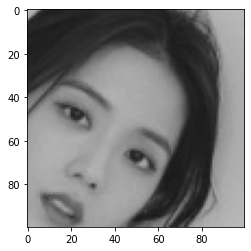

예지


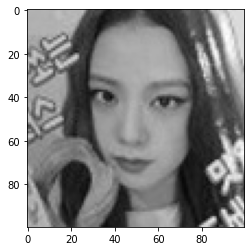

지수


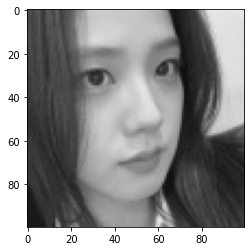

지수


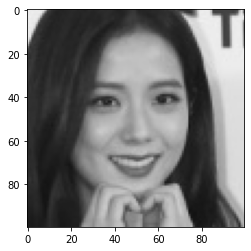

지수


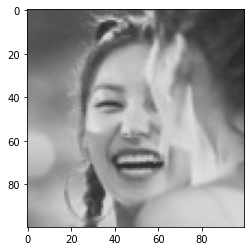

지수


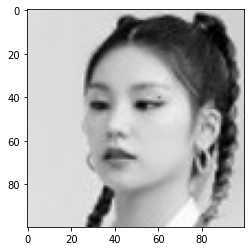

예지


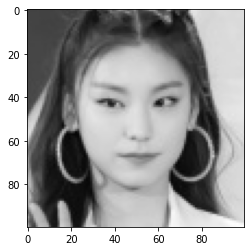

예지


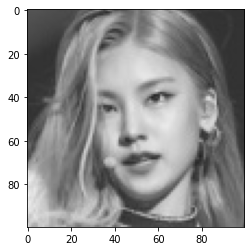

예지


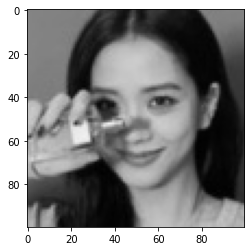

지수


In [43]:
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'/'+i,
                        # target_size=(100,100)
                        )
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    
    if not val :
        print('지수')
    else:
        print('예지')